IMPORTING THE LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION AND PROCESSING

In [4]:
#Loading the CSV data to a pandas dataframe
gold_data = pd.read_csv('anaconda3/gld_price_data - Copy.csv')

In [5]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
#NUMBER OF ROWS AND COLUMNS
gold_data.shape

(2290, 6)

In [11]:
#GETTING SOME BASIC INFORMATION ABOUT THE DATA
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
#GETTING THE STATISTICAL MEASURES OF THE DATA
gold_data.describecribe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CORRELATION:
    1.Positive Correlation(Directly Proportional)
    2.Negative Correlation(Inversely Proportional)


In [30]:
correlation = gold_data.corr()

C:\Users\Taranjeet\AppData\Local\Temp\ipykernel_13408\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


In [31]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

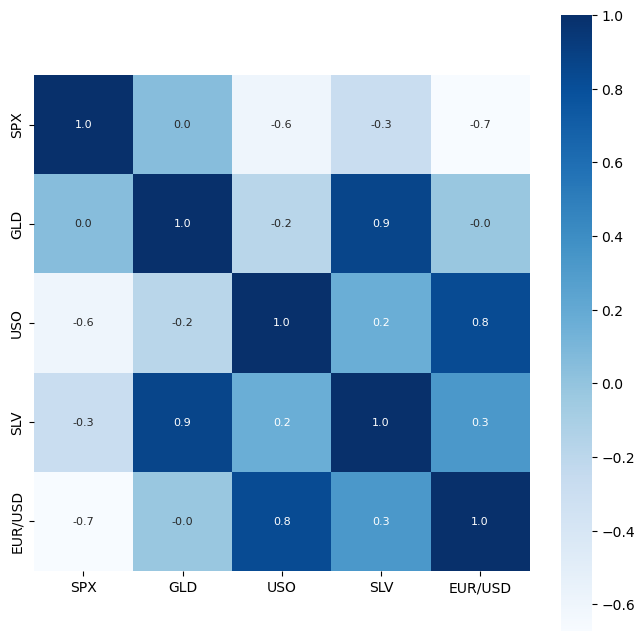

In [32]:
#CONSTRUCTING A HEAT MAP TO UNDERSTAND THE CORRELATION
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [33]:
#CORRELATION VALUES OF GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Figure size 300x1000 with 0 Axes>

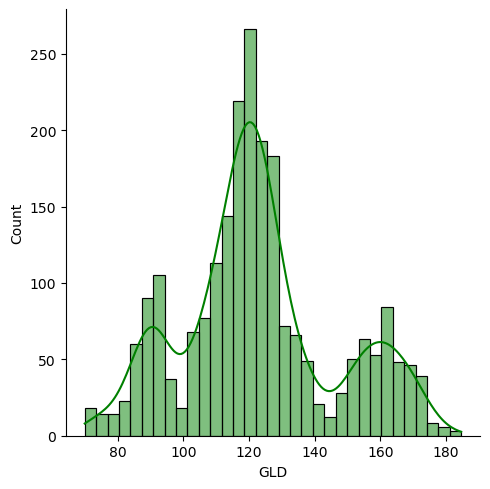

In [40]:
#CHECK THE DISTRIBUTION OF THE GOLD PRICES
fig = plt.figure(figsize = (3,10))
sns.displot(data = gold_data['GLD'],color= 'green',kde = True)

SPLITTING THE FEATURES AND TARGET

In [42]:
X = gold_data.drop(['Date','GLD'],axis = 1)
Y = gold_data['GLD']

In [43]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [44]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

SPLITTING INTO TRAINING DATA AND TESTING DATA

In [47]:
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=0.2,random_state=2)

MODEL TRAINING : Random Forest Regressor

In [57]:
regressor = RandomForestRegressor(n_estimators=10)

In [58]:
#TRAINING THE MODEL
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10)

MODEL EVALUATION

In [59]:
#PREDICTION ON TEST DATA
test_data_prediction = regressor.predict(X_test)

In [60]:
test_data_prediction

array([168.5209992,  80.9050004, 114.9149995, 127.1880004, 120.2240019,
       154.9179975, 149.8839965, 126.2669994, 117.756999 , 126.0130005,
       116.1630012, 172.0650011, 142.1509965, 168.484001 , 114.5859996,
       117.6809998, 136.5290038, 170.5820021, 159.9250018, 155.0599991,
       155.3100008, 124.2829995, 172.1930008, 156.7740033, 125.1670008,
        93.4549987,  77.8539996, 120.5870003, 118.8089981, 167.6899995,
        88.382    , 124.9839991,  90.8320009, 117.7949995, 121.3299981,
       135.9960007, 115.8660018, 115.2110017, 146.4410004, 108.576001 ,
       104.9420023,  86.7079986, 126.1310004, 118.5930001, 152.8839997,
       119.2499992, 108.4089995, 108.7369973,  92.8109995, 126.7279992,
        75.6420005, 113.7350004, 121.0839996, 111.7519991, 119.0159996,
       121.066999 , 155.4759993, 170.4940001, 146.7389953,  85.6209991,
        94.9979996,  86.4899984,  90.7470009, 118.8160004, 126.6480011,
       127.8420014, 168.6849991, 122.4829993, 117.7859991,  98.7

In [52]:
type(test_data_prediction)

numpy.ndarray

In [61]:
#R SQUARED ERROR
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R SQUARED ERROR : ',error_score)

R SQUARED ERROR :  0.9856021245590544


COMPARE THE ACTUAL VALUES AND PREDICTED VALUES I A PLOT

In [64]:
Y_test = list(Y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

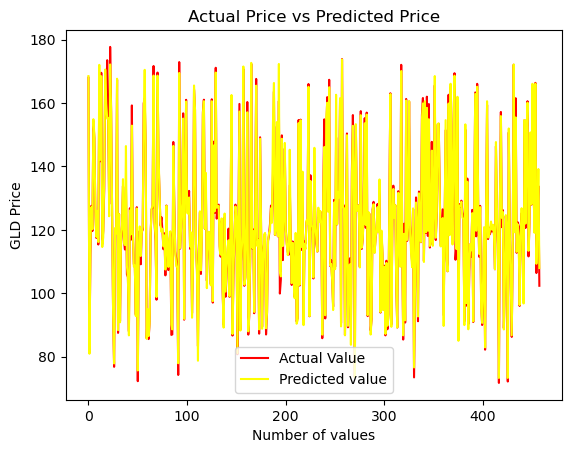

In [65]:
plt.plot(Y_test,color = 'red',label = 'Actual Value')
plt.plot(test_data_prediction,color = 'yellow',label = 'Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show